In [2]:
# Modified from https://github.com/meng-li/sampling-study

from samplingexamples import *

# Distributions

Proposal distribution is N([1.0, 1.0], [1.5, 2.0])
Target distribution is the uniform over the square with x_0 in [-1.0, 1.0] and x_1 in [-1.0, 1.0]

(-4.0, 4.0)

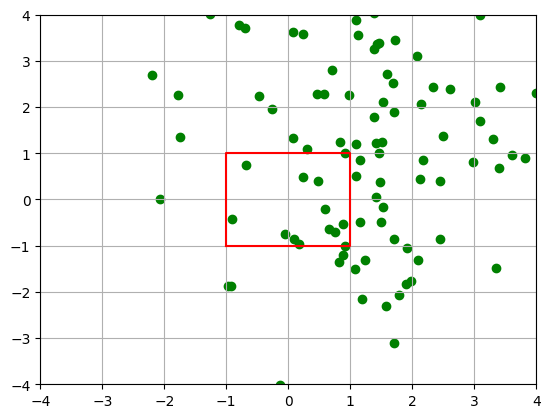

In [3]:
#getting a sample from the proposal distribution
proposal = proposal_sample(100)
#plotting it
p.scatter(proposal[:, 0], proposal[:,1], color = 'green')

#plotting the bounds of the target distr
plot_target()

#setting the plotting options
p.grid(True)
p.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
p.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

# Rejection Sampling

In [4]:
#Next, we demonstrate how we can use rejection sampling to obtain a sample from the target distribution 
#if we're allowed to sample from the proposal distribution only (see demo_rejection() in sampling.py)

#obtaining parameter K
rejection_K = rejection_sampling_K()

size = 1000
sample = proposal_sample(size)

#as we see, the mean of the proposed sample is close to the center of the Gaussian
print ('mean of the proposal sample', sample.mean(0))

mean of the proposal sample [1.0206483  1.07564739]


mean of the sample from the target distribution [0.02161888 0.09963825]


(-4.0, 4.0)

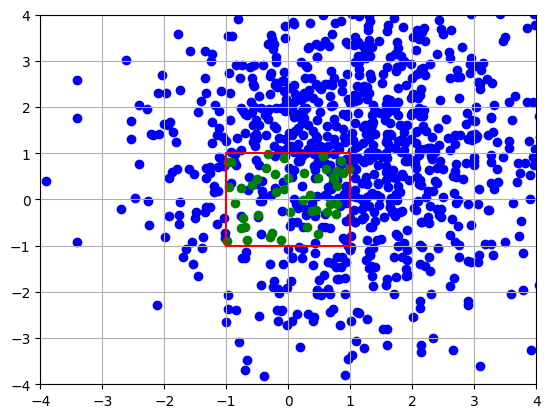

In [5]:
accepted, rejected = rejection_sampling(sample, rejection_K)
print ('mean of the sample from the target distribution', accepted.mean(0))

#plotting the whole thing
plot_target()
                                                         
#points rejected in blue
p.scatter(rejected[:, 0], rejected[:, 1], color='blue')
#points accepted in green
p.scatter(accepted[:, 0], accepted[:, 1], color='green')

p.grid(True)
p.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
p.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

# Importance Sampling

In [6]:
size = 1000                                                                                                              

sample = proposal_sample(size)
weights = importance_sampling(sample)
print ('mean of the proposal sample', sample.mean(0))
print ('mean of the target sample', (sample * np.array([weights, weights]).T).mean(0))

mean of the proposal sample [0.89890181 1.05293594]
mean of the target sample [-0.02672377  0.09769282]


# Sampling Importance Resampling

mean of the proposal sample [0.96401243 1.03808808]
mean of the target sample [-0.01442846  0.0258399 ]
resample size 1000, total 10000


(-4.0, 4.0)

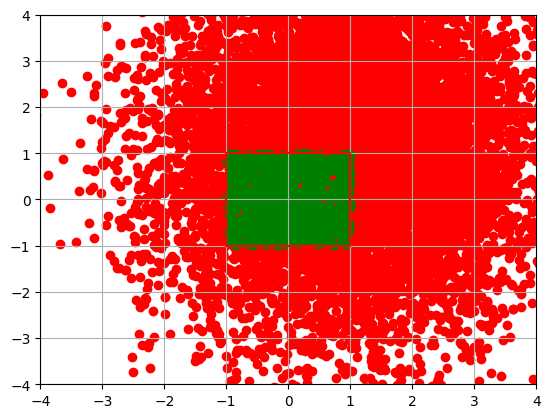

In [7]:
iterations = 100
proposal_size = 100
target_size = 10

resample, sample = sampling_resampling(iterations, proposal_size, target_size)                                           
print ('mean of the proposal sample', sample.mean(0))
print ('mean of the target sample', resample.mean(0))
print ('resample size %s, total %s'%(resample.shape[0], sample.shape[0]))

plot_target()

p.scatter(sample[:, 0], sample[:, 1], color='red')
p.scatter(resample[:, 0], resample[:, 1], color='green')

p.grid(True)
p.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
p.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

# Metropolis-Hastings

mean of the resulting sample [-0.0007708  -0.00093182]
accepted 1000, rejected 8319, total 10000


(-4.0, 4.0)

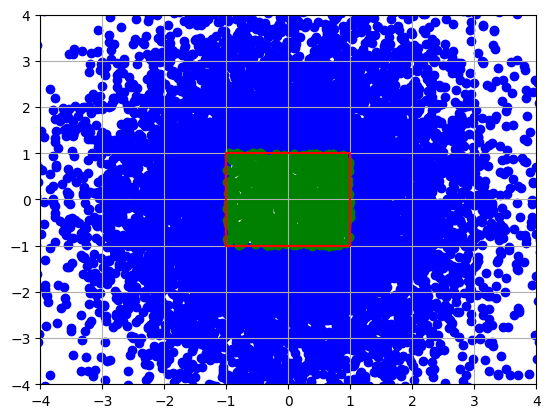

In [8]:
size = 10000
sieve = [10 *k for k in range(1000)]
accepted, rejected = metropolis_sampling(size)
accepted = accepted[sieve, :]

print ('mean of the resulting sample', accepted.mean(0))
print ('accepted %s, rejected %s, total %s'%(accepted.shape[0], rejected.shape[0], size))

plot_target()
p.scatter(rejected[:, 0], rejected[:, 1], color='blue')
p.scatter(accepted[:, 0], accepted[:, 1], color='green')

p.grid(True)                                                                                                             
p.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
p.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

# Gibbs Sampling

mean of the resulting sample [array([-0.02204112]) array([-0.00535645])]


(-4.0, 4.0)

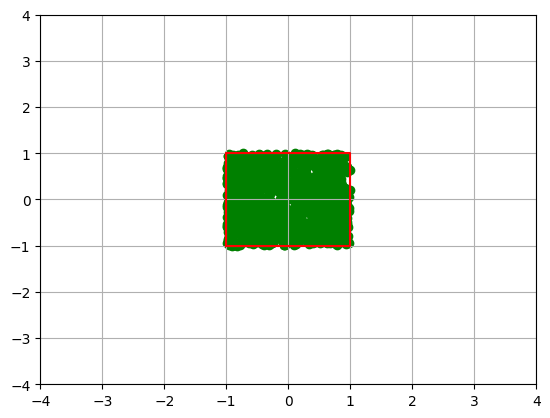

In [9]:
target_size = 1000
sample = gibbs_sampling(target_size)

print ('mean of the resulting sample', sample.mean(0))
plot_target()
p.scatter(sample[:, 0], sample[:, 1], color='green')
p.grid(True)
p.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
p.ylim(target_x_1[0] - 3, target_x_1[1] + 3)